In [1]:
#%matplotlib ipympl  # enable this for realtime graphs

# first compile the c modules where the model depends on
from  explain_core.ModulesCompiler import compile_modules;
compile_modules()

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine
from explain_core.helpers.Interface import Interface

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# get a reference to all the submodels
models = model.models

# instantiate an interface object to interact with the model engine instance
neo = Interface(model)

# enable or disable the physiological submodels which can be enabled or disabled.
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(True)
neo.drugs(False)

# desiable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.artificial_whomb(False)
neo.resuscitation(True)


# get a direct reference to the mob model
cpr = models["Resuscitation"]

# stabilize by calculating 60 seconds with fixed resp_rate of 40/min, tidal volume of 16 ml and fixed heart rate of 140 / min
neo.calculate(30)

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 2.1 sec. Average model step in 0.0351 ms.


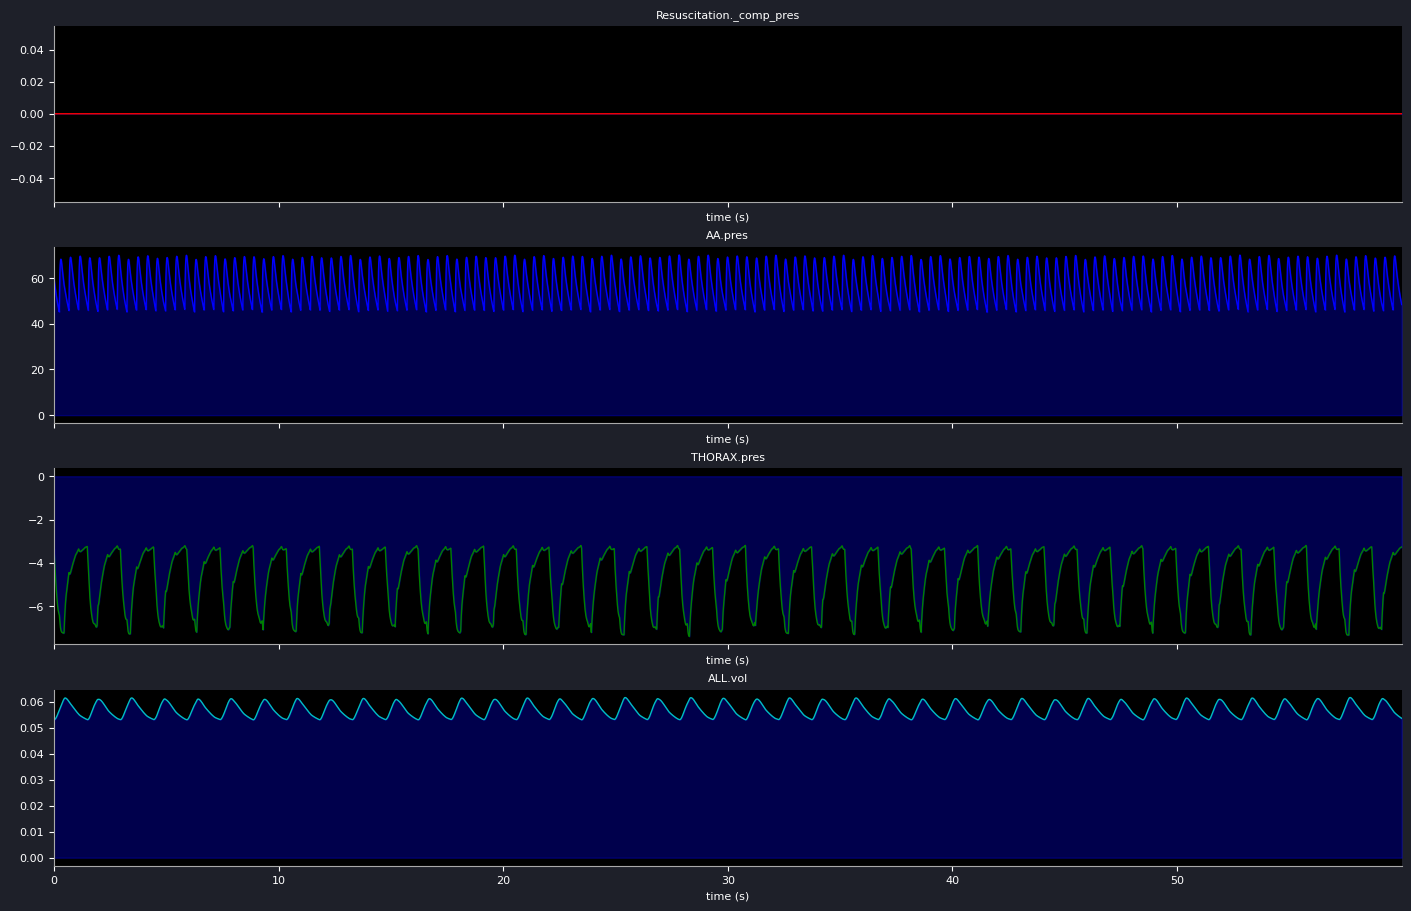


Resuscitation._comp_pres: max        0.0 min        0.0
AA.pres         : max   70.08236, min   45.05709 mmHg
THORAX.pres     : max   -3.19316, min    -7.4009 mmHg
ALL.vol         : max   61.60969, min   53.04384 ml


In [4]:
#cpr.start_cpr()
neo.plot_time_graph(["Resuscitation._comp_pres","AA.pres","THORAX.pres", "ALL.vol"], combined=False, sharey=False, time_to_calculate=60.0)

In [3]:
neo.fastforward(60)
neo.get_vitals()

 Ready in 3.4 sec. Average model step in 0.0283 ms.

AA.pres_in      : max   75.48969, min   49.41959 mmHg
PA.pres_in      : max   44.24052, min   23.54101 mmHg
IVCI.pres_in    : max    8.90918, min     5.5947 mmHg


{'heartrate': 139.70253141101466,
 'spo2_pre': 97.7840155672508,
 'spo2_post': 97.45548615091194,
 'abp_systole': 75.48969,
 'abp_diastole': 49.41959,
 'pap_systole': 44.24052,
 'pap_diastole': 23.54101,
 'cvp': 6.6994161839999995,
 'resp_rate': 40.76963940758485,
 'pH': 7.4018970313700585,
 'po2': 97.20064817189419,
 'pco2': 42.226458406333336,
 'hco3': 25.953472029629822,
 'be': 0.7368353914848839}